In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns

In [2]:
# import cleaned data
df = pd.read_csv('../Data/gss_subset_cleaned.csv')

In [3]:
# check dtypes and nulls in current csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59599 entries, 0 to 59598
Data columns (total 28 columns):
year        59599 non-null float64
marital     59575 non-null object
divorce     59346 non-null object
sibs        57913 non-null float64
childs      59410 non-null float64
age         59599 non-null float64
educ        59434 non-null float64
paeduc      42058 non-null float64
maeduc      49200 non-null float64
speduc      30774 non-null float64
sex         59599 non-null object
hompop      59593 non-null float64
babies      59280 non-null float64
preteen     59253 non-null float64
teens       59327 non-null float64
adults      59535 non-null float64
earnrs      59060 non-null float64
income      52072 non-null float64
polviews    52491 non-null float64
happy       54851 non-null float64
health      44136 non-null float64
weekswrk    28181 non-null float64
satjob      43172 non-null float64
satfin      54986 non-null float64
goodlife    18127 non-null float64
dwelling    46699 n

In [4]:
# list categorical columns and numerical columns for filtering
categorical_cols = ['marital', 'sex','divorce', 'dwelling', 'hhrace', 'dwelown']
numerical_cols = df.columns.drop(categorical_cols)

categorical_cols

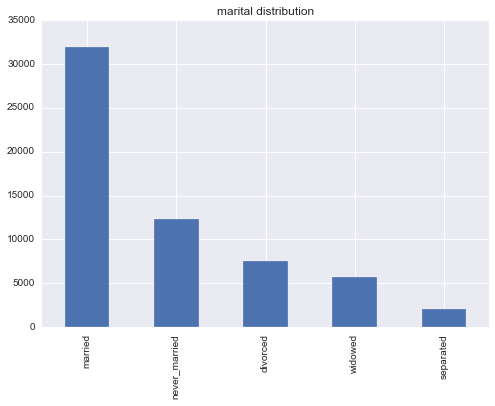

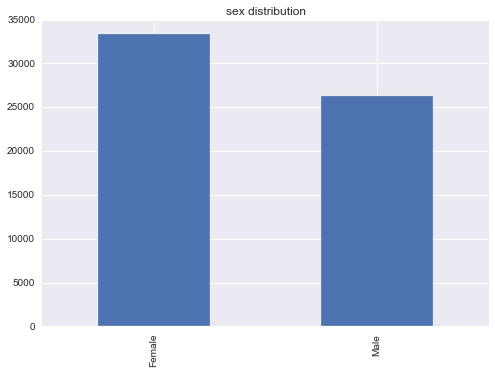

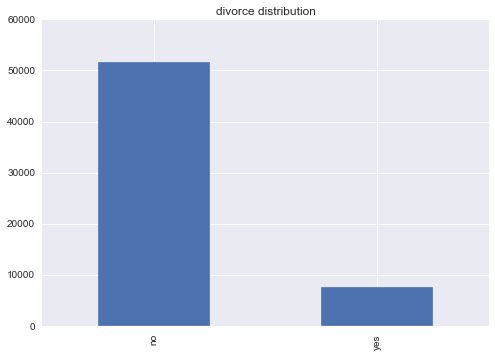

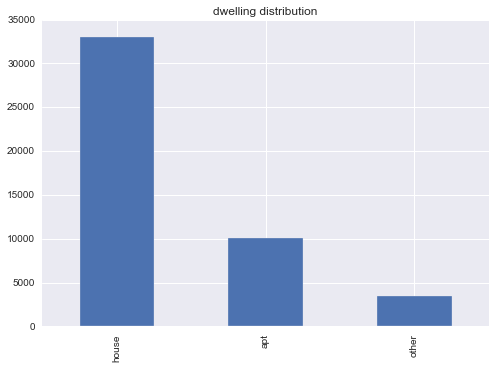

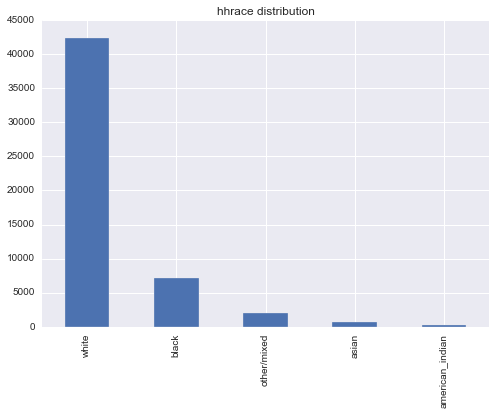

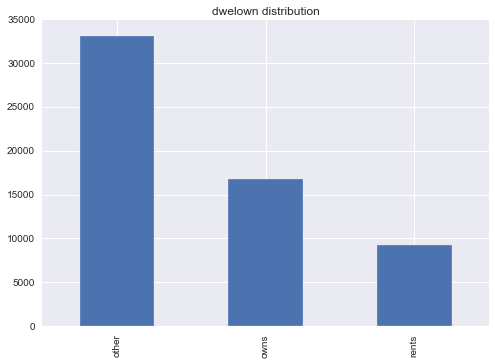

In [5]:
# look at histogram for each categorical 
for col in df[categorical_cols]:
    df[col].value_counts().plot(kind='bar')
    plt.title(col+" distribution")
    plt.show()

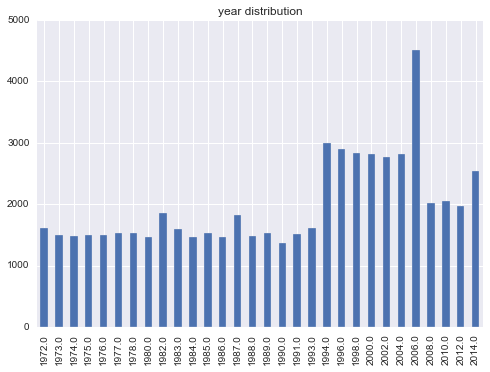

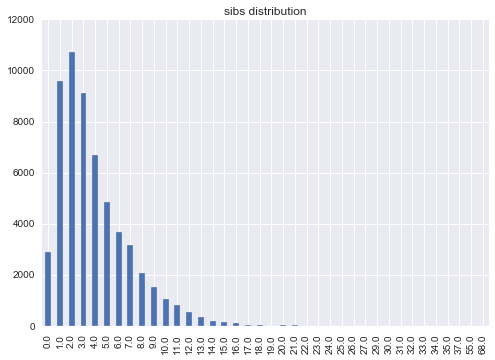

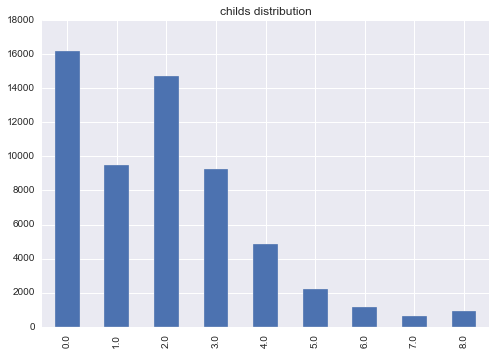

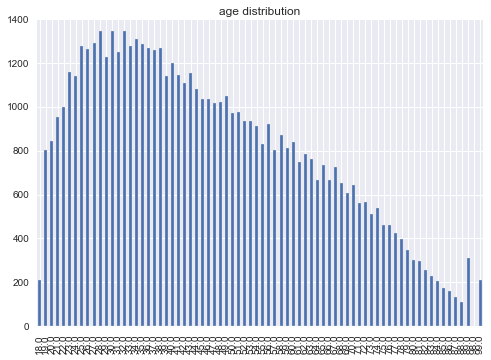

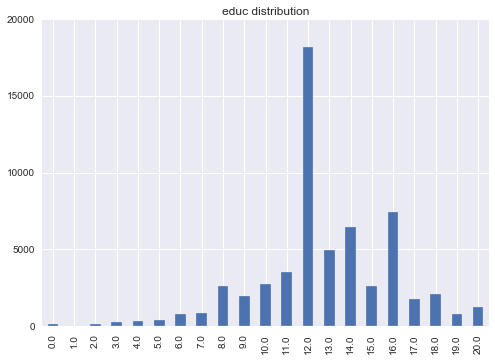

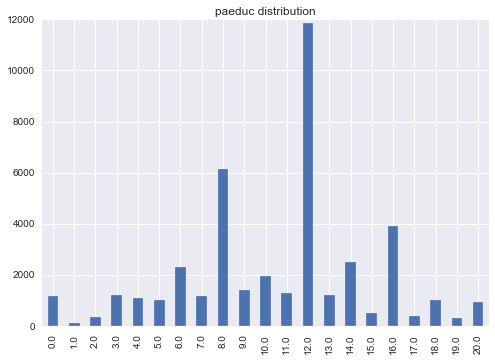

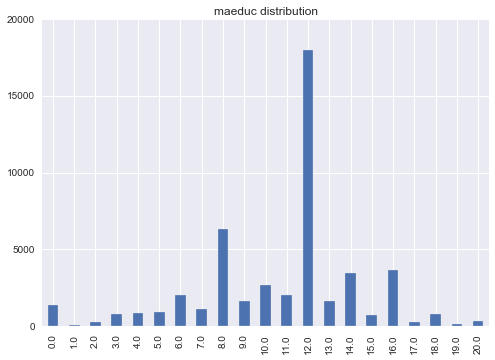

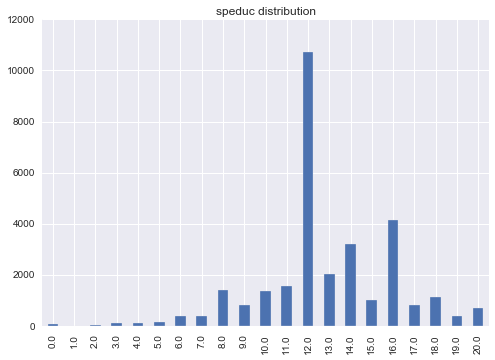

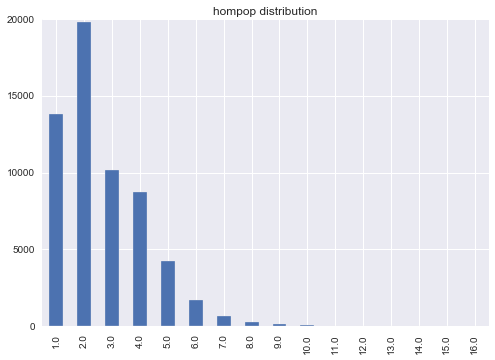

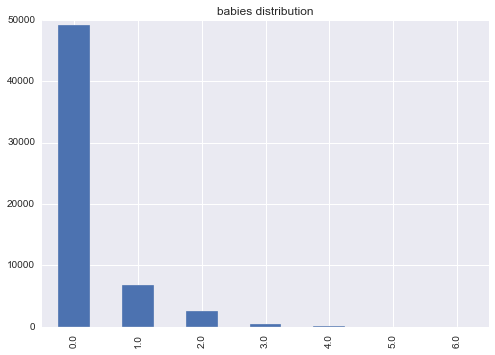

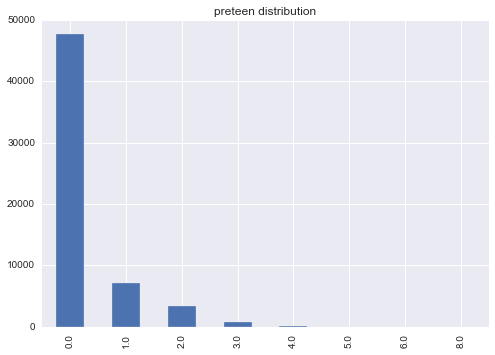

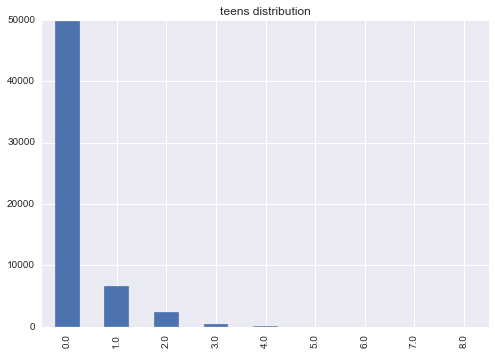

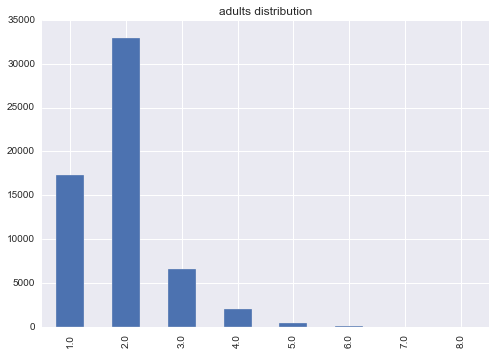

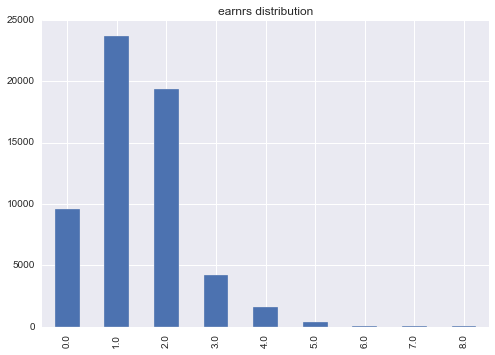

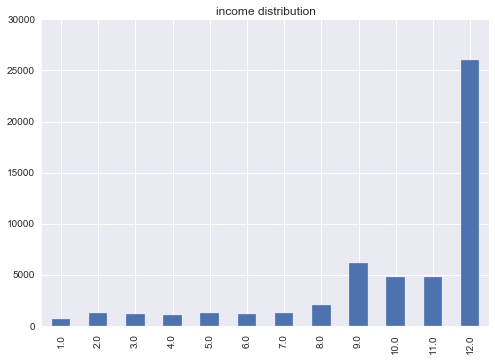

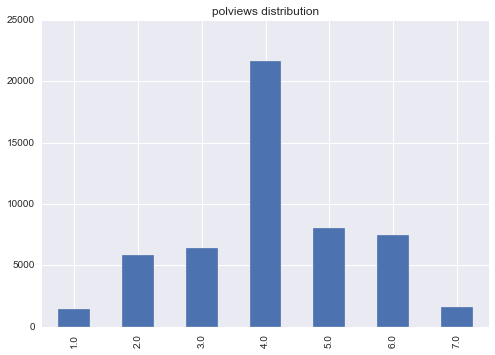

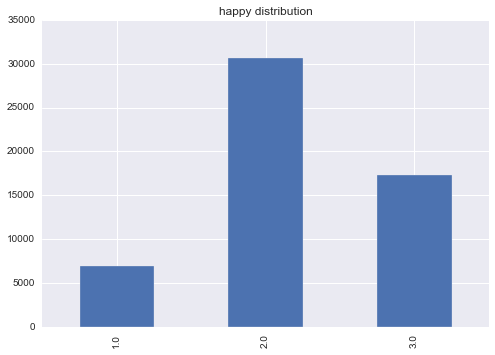

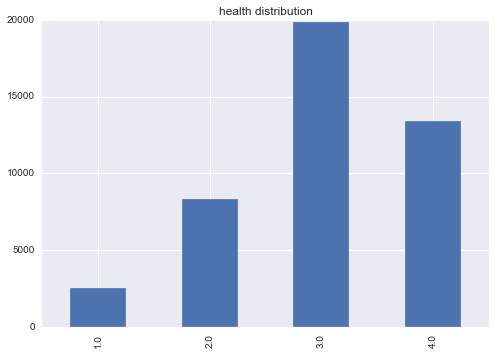

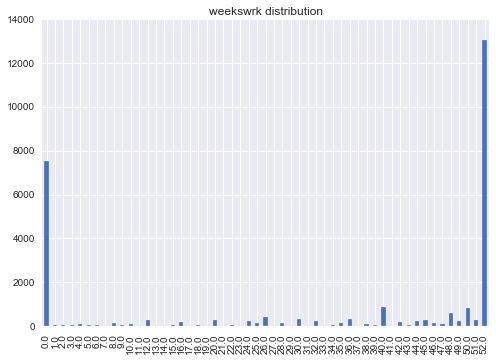

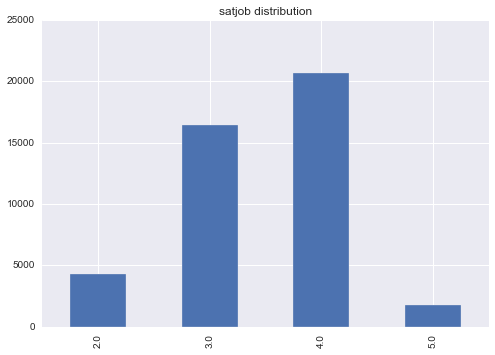

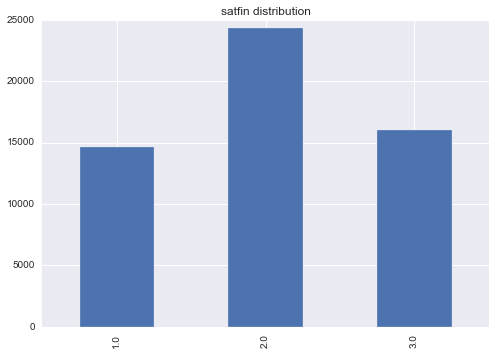

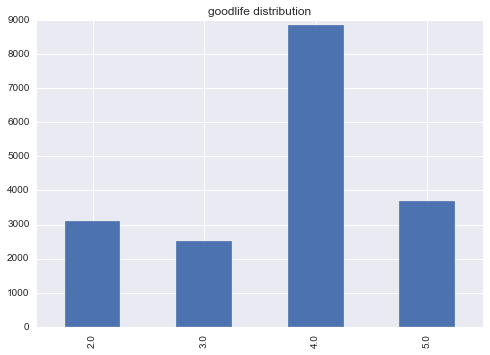

In [6]:
# look at histogram for each numerical 
for col in df[numerical_cols]:
    df[col].value_counts().sort_index().plot(kind='bar')
    plt.title(col+" distribution")
    plt.show()

In [7]:
# look for high correlation (over 50%)
corrs = pd.get_dummies(df).corr()
highcorrs = []
for col in corrs:
    for ind in corrs.index:
        if col < ind:
            corr = corrs.loc[ind, col]
            if corr > 0.5:
                highcorrs.append((ind, col, corr))
for line in highcorrs: print line

('speduc', 'educ', 0.63375094348449534)
('paeduc', 'maeduc', 0.68781603554157034)
('preteen', 'hompop', 0.62221079652646305)
('teens', 'hompop', 0.53483350042451128)
('hompop', 'adults', 0.64046772378230421)
('earnrs', 'adults', 0.55431105083639709)


### Based on the high correlations among these variables, drop education variables aside from the respondent, as well as the home population and earners variables.

In [8]:
df.drop(['speduc', 'maeduc', 'paeduc', 'hompop', 'earnrs'], axis=1, inplace=True)

In [10]:
df.head()

,year,marital,divorce,sibs,childs,age,educ,sex,babies,preteen,...,polviews,happy,health,weekswrk,satjob,satfin,goodlife,dwelling,dwelown,hhrace
0,1972.0,never_married,no,3.0,0.0,23.0,16.0,Female,0.0,0.0,...,NaN,1.0,3.0,NaN,2.0,1.0,NaN,NaN,other,NaN
1,1972.0,married,no,4.0,5.0,70.0,10.0,Male,0.0,0.0,...,NaN,1.0,2.0,NaN,NaN,2.0,NaN,NaN,other,NaN
2,1972.0,married,no,5.0,4.0,48.0,12.0,Female,0.0,1.0,...,NaN,2.0,4.0,NaN,3.0,3.0,NaN,NaN,other,NaN
3,1972.0,married,no,5.0,0.0,27.0,17.0,Female,0.0,0.0,...,NaN,1.0,3.0,NaN,4.0,1.0,NaN,NaN,other,NaN
4,1972.0,married,no,2.0,2.0,61.0,12.0,Female,0.0,0.0,...,NaN,2.0,3.0,NaN,NaN,3.0,NaN,NaN,other,NaN


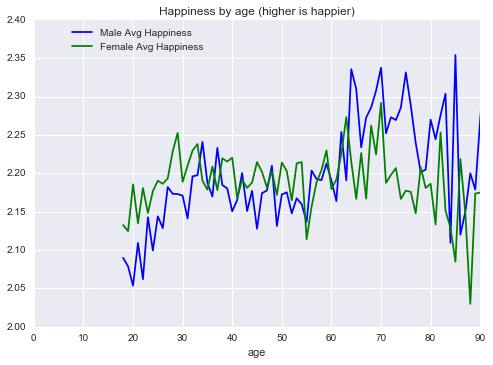

In [17]:
# look at happiness by age for male and female respondents
ax1 = plt.subplot(111)
df[df['sex']=='Male'].groupby(['age']).agg({'happy':
    np.mean}).plot(color='b', xlim = (0,90), ylim = (2,2.4),
    ax = ax1, legend = False)
df[df['sex']=='Female'].groupby(['age']).agg({'happy':
    np.mean}).plot(color='g',xlim = (0,90),
    ax = ax1)
plt.legend(['Male Avg Happiness', 'Female Avg Happiness'],
    bbox_to_anchor = (0.4,1))
plt.title('Happiness by age (higher is happier)')
plt.show()



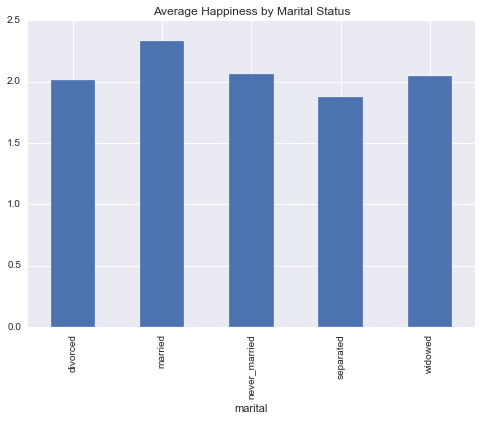

In [18]:
# plot happiness by marital status
ax2 = plt.subplot(111)
df.groupby('marital').agg({'happy': np.mean}).plot(kind='bar', legend=False, ax=ax2)
plt.title('Average Happiness by Marital Status')
plt.show()

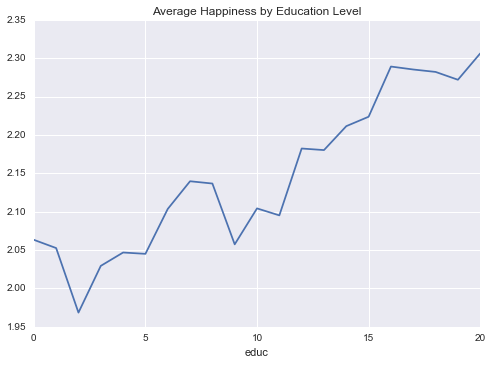

In [19]:
# average happiness by education level
ax3 = plt.subplot(111)
df.groupby('educ').agg({'happy': np.mean}).plot(kind='line', legend=False, ax=ax3)
plt.title('Average Happiness by Education Level')
plt.show()

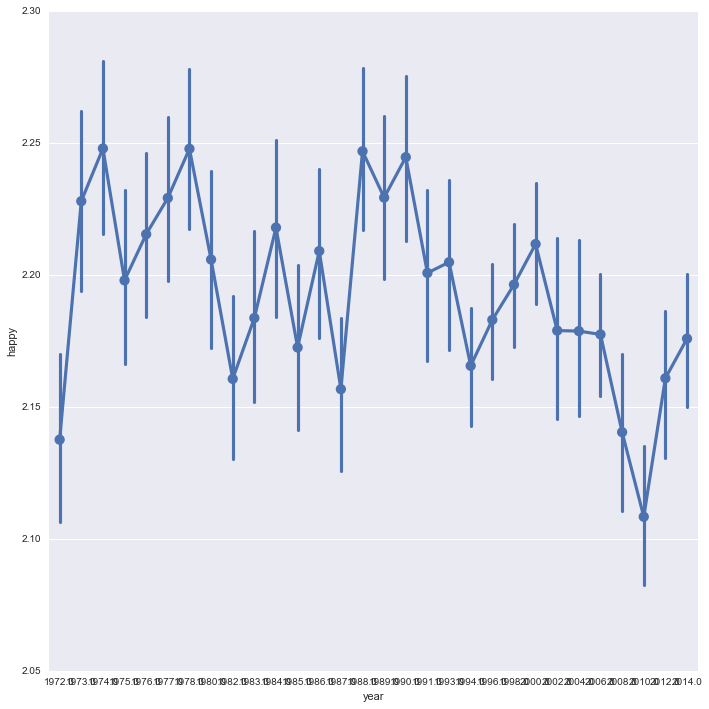

In [22]:
# self reported happiness over time
sns.factorplot(
    x = 'year',
    y = 'happy',
    data = df,
    size = 10
    )

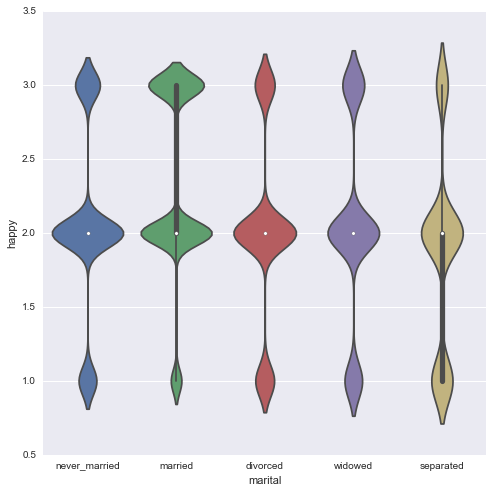

In [24]:
# happiness by marital status: violinplot
sns.factorplot(
    x = 'marital',
    y = 'happy',
    data = df,
    size = 7,
    kind='violin'
    )

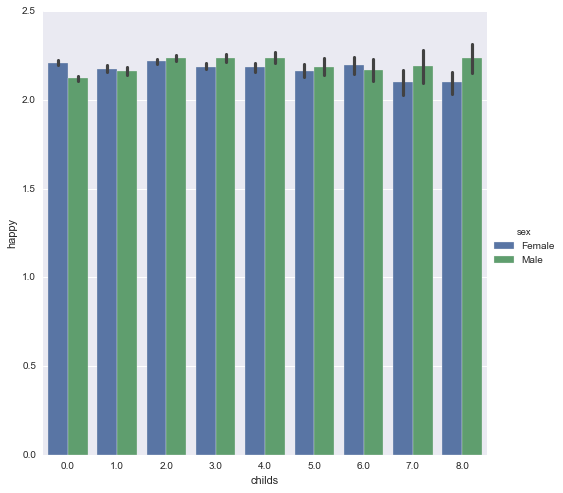

In [25]:
# look at happiness by number of children
sns.factorplot(
    x = 'childs',
    y = 'happy',
    data = df,
    hue = 'sex',
    size = 7,
    kind='bar'
    )

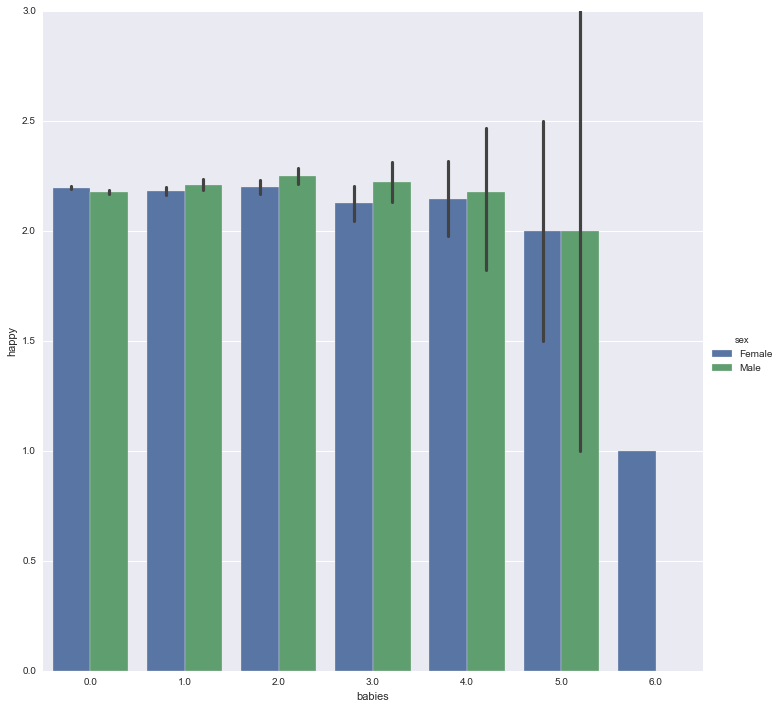

In [26]:
# look at happiness by number of children under 6 years old
sns.factorplot(
    x = 'babies',
    y = 'happy',
    data = df,
    hue = 'sex',
    size = 10,
    kind='bar'
    )

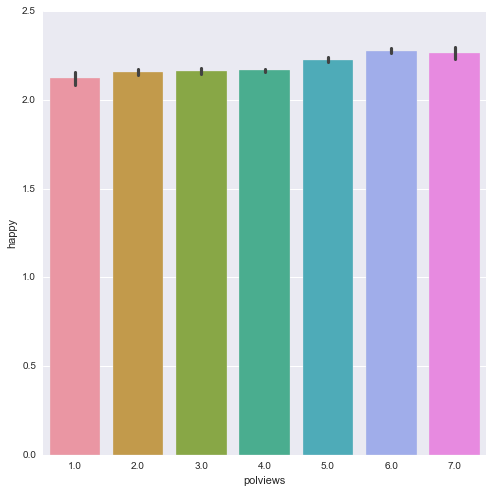

In [27]:
# look at happiness by political views (from 1: extremely liberal to 7: extremely conservative)
sns.factorplot(
    x = 'polviews',
    y = 'happy',
    data = df,
    size = 7,
    kind='bar'
    )

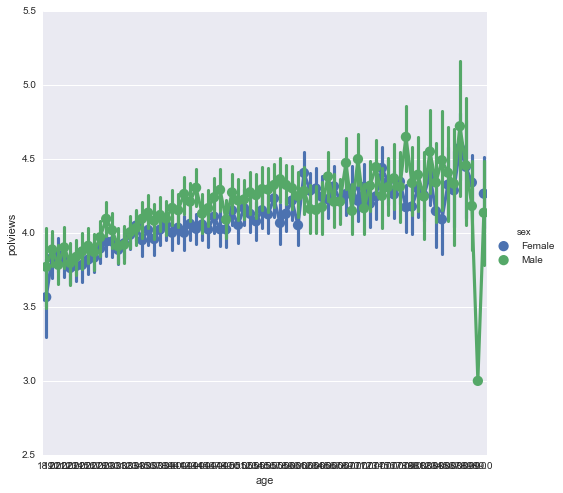

In [28]:
# look at political views (from 1: extremely liberal to 7: extremely conservative) by age
sns.factorplot(
    x = 'age',
    y = 'polviews',
    data = df,
    size = 7,
    kind='point',
    hue = 'sex'
    )

In [29]:
# create new column for decade
def decade_sorter(x):
    if x >= 1970 and x <1980:
        return 1
    elif x >=1980 and x < 1990:
        return 2
    elif x >=1990 and x < 2000:
        return 3
    elif x >= 2000 and x < 2010:
        return 4
    elif x >= 2010 and x < 2020:
        return 5 

In [30]:
df['decade'] = df['year'].apply(decade_sorter)

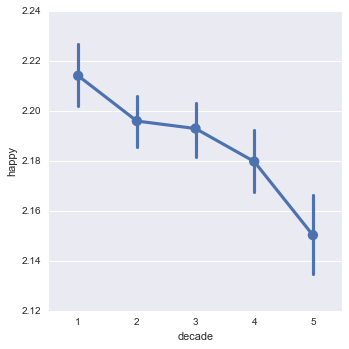

In [43]:
# look at average happiness by decade
sns.factorplot(
    x = 'decade',
    y = 'happy', 
    data = df, 
    kind = 'point',
    size = 5)

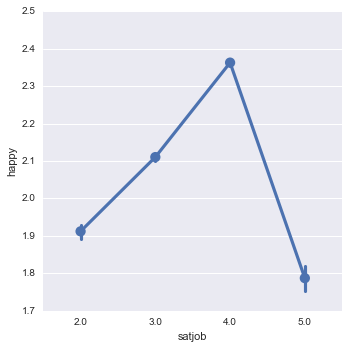

In [44]:
# look at the relationship between job satisfaction and happiness
sns.factorplot(
    x = 'satjob',
    y = 'happy', 
    data = df, 
    kind = 'point',
    size = 5)

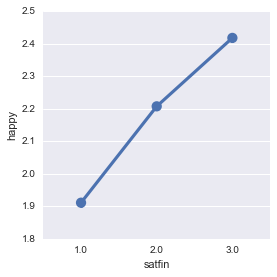

In [41]:
# look at financial satisfaction vs happiness
sns.factorplot(
    x = 'satfin',
    y = 'happy', 
    data = df, 
    kind = 'point')

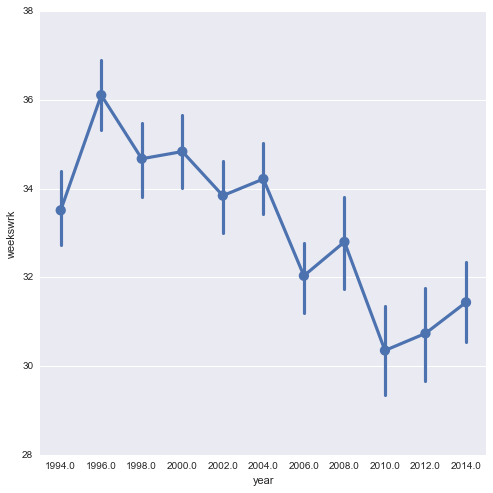

In [42]:
# look at avg # weeks worked over time
sns.factorplot(
    x = 'year',
    y = 'weekswrk', 
    data = df[df['year']>=1994], 
    kind = 'point',
    size=7)